In [1]:
## Libraries
from collections import Counter


from math import *
import numpy as np
import pandas as pd
import matplotlib.pylab as pl
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

from models import Models
from models_dict_v2 import model_dict
from generate_synthetic_df import generate_synthetic_df

In [2]:
## Create dataframe

npol = 1000
nper = 1000

# Creates synthetic dataframe
df = generate_synthetic_df(npol*nper, 0)

# Instantiate an object from the class "Models"
models = Models(model_dict)

# Calculate the cost and price
cost = models.calculate_cost(df)
pricing = models.calculate_pricing(df)

# Calculate the profit on the synthetic dataframe
df["profit"] = models.calculate_profit(cost, pricing)

# Create identification variable
df["id"] = np.tile(np.arange(npol), nper)

# Create time period variable
df["time"] = np.repeat(np.arange(nper), npol)

# Do one-hot encoding on the categorical variables
df = pd.get_dummies(df)
df = df.drop("MARITAL_STATUS_Not_Single", axis=1)

[Text(0.5, 0.875, 'DRIVER_AGE <= 49.5\nsquared_error = 4252.905\nsamples = 1000000\nvalue = 2.721'),
 Text(0.25, 0.625, 'DRIVER_AGE <= 33.5\nsquared_error = 2937.425\nsamples = 499775\nvalue = -42.429'),
 Text(0.125, 0.375, 'VEHICLE_AGE <= 7.5\nsquared_error = 3333.7\nsamples = 173284\nvalue = -79.642'),
 Text(0.0625, 0.125, 'squared_error = 2917.622\nsamples = 97931\nvalue = -104.759'),
 Text(0.1875, 0.125, 'squared_error = 1989.053\nsamples = 75353\nvalue = -47.0'),
 Text(0.375, 0.375, 'VEHICLE_AGE <= 7.5\nsquared_error = 1602.006\nsamples = 326491\nvalue = -22.678'),
 Text(0.3125, 0.125, 'squared_error = 1436.977\nsamples = 185135\nvalue = -39.645'),
 Text(0.4375, 0.125, 'squared_error = 947.301\nsamples = 141356\nvalue = -0.456'),
 Text(0.75, 0.625, 'DRIVER_AGE <= 65.5\nsquared_error = 1495.723\nsamples = 500225\nvalue = 47.83'),
 Text(0.625, 0.375, 'DRIVER_AGE <= 57.5\nsquared_error = 739.363\nsamples = 326735\nvalue = 27.473'),
 Text(0.5625, 0.125, 'squared_error = 715.568\nsampl

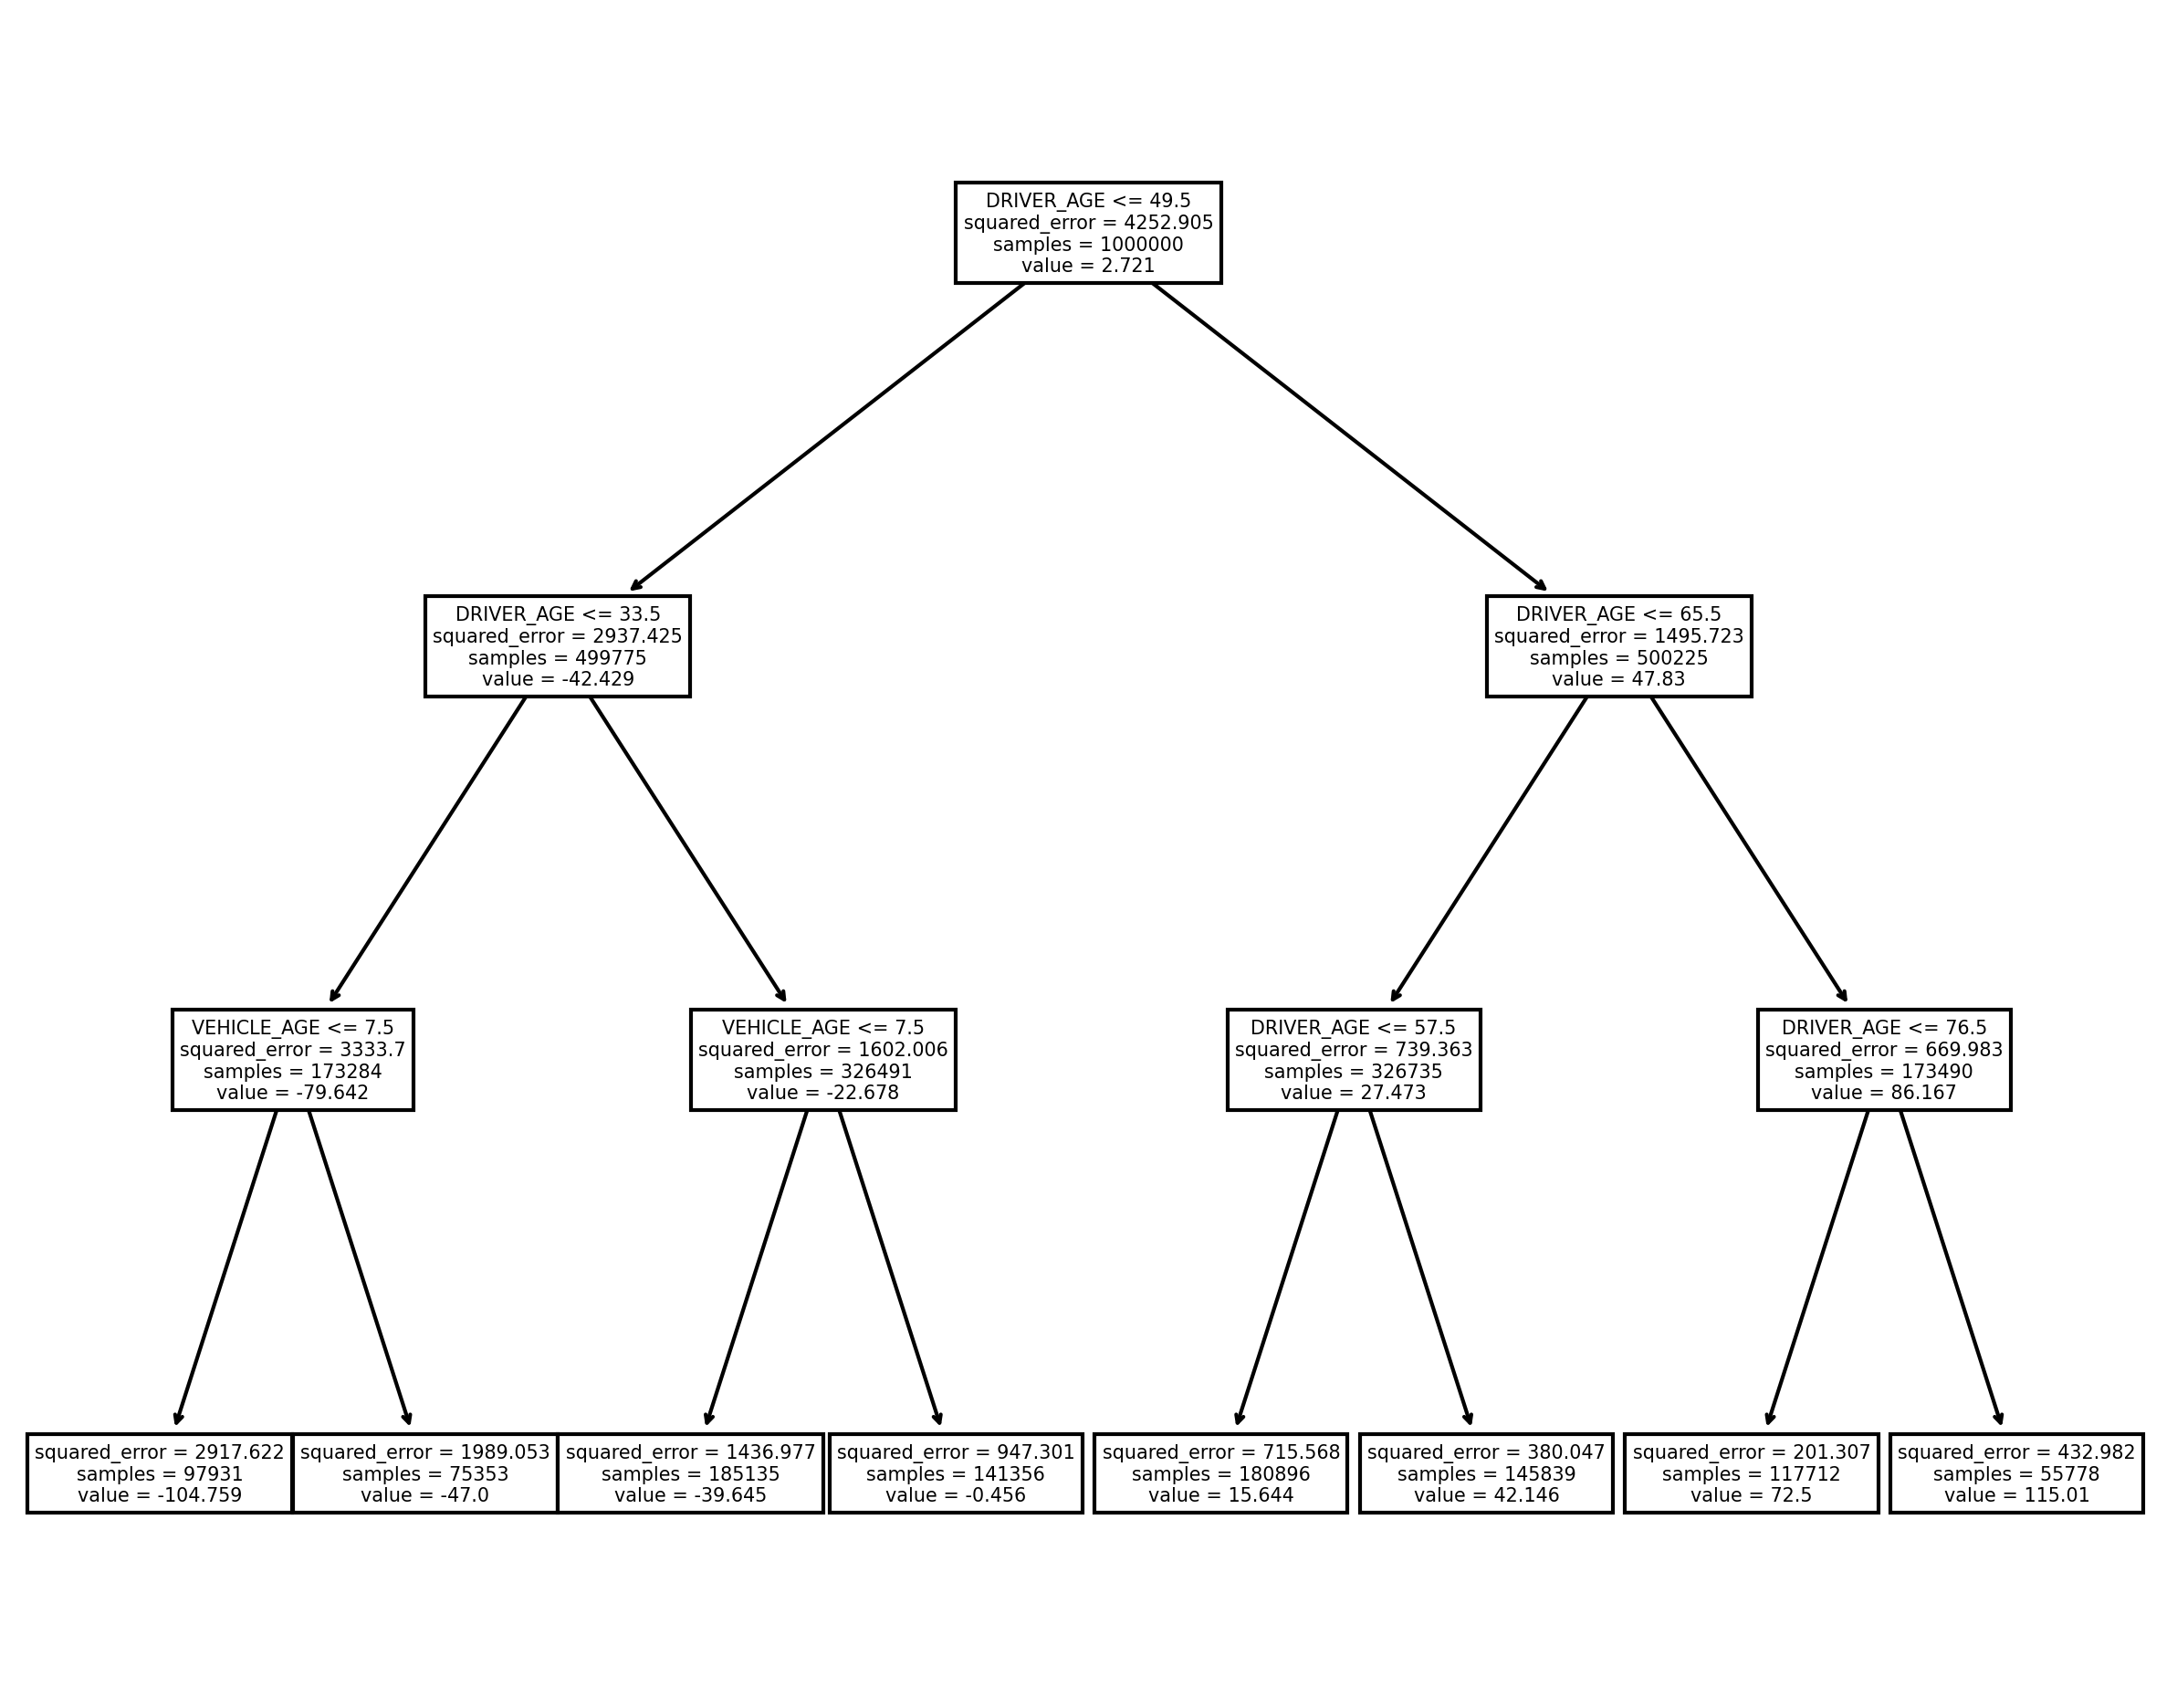

In [3]:
## Fit the regression tree

# Create the tree
X = df.drop(["id", "profit", "time"], axis=1)
y = df["profit"]
tree = DecisionTreeRegressor(max_depth = 3)
tree.fit(X,y)

# Plot the tree
plt.figure(figsize=(10,8), dpi=300)
plot_tree(tree, feature_names=X.columns)

In [4]:
## Calculate the transition matrix

# Create a matrix of the evolution of states
leaves = tree.apply(X)
states = pd.DataFrame(np.split(leaves, nper))
states = states.transpose()

# Calculate the probability of transitions
start = leaves[:-npol]
end = leaves[npol:]

values = np.unique(leaves)

# Calculate the number of transitions
trans = []
for i in values:
    index = np.where(start==i)[0]
    for k in values: trans = np.append(trans, np.count_nonzero(end[index] == k))

# Calculate probability of transitions
prob = pd.DataFrame(np.split(trans, len(values)))
prob = prob.div(prob.sum(axis=1), axis=0)

In [5]:
prob
#The states that have NaN are those which no customers depart from, or equivalently, those that are only in the last column of "states"

,0,1,2,3,4,5,6,7
0,0.098244,0.076118,0.183172,0.140953,0.180831,0.147341,0.118030,0.055310
1,0.098607,0.076635,0.184142,0.139149,0.181697,0.145804,0.118253,0.055713
2,0.097272,0.075352,0.185666,0.142388,0.180578,0.145341,0.116932,0.056471
3,0.098678,0.074697,0.186335,0.140428,0.180011,0.145456,0.119153,0.055242
4,0.098076,0.075101,0.185500,0.141387,0.181117,0.145360,0.117698,0.055761
5,0.098186,0.074197,0.183715,0.143576,0.181299,0.145024,0.118132,0.055871
6,0.097661,0.075858,0.186121,0.139880,0.180585,0.146453,0.117746,0.055697
7,0.096267,0.076651,0.185266,0.141278,0.182089,0.148295,0.114340,0.055815
